# **PNEMONIA CLASSIFICATION:**

1.Dataset consist of Chest X-RAY Images of Patients.

2.Data Folder Consist of Images of two categories i.e **"NORMAL"** and **"PNEMONIA"**.

3.In Data Folder Data is splitted into the Train, Test and Validation.

4 Classification of the patient as **"NORMAL"** or **"PNEMONIA"** is done by using the CHEST X-RAY Images and Training with DEEP LEARNING MODELS and using **"TRANSFER LAEARNING"** approach for better classification.

5.Images were collected from Kaggle.com here is the [Link](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)







In [ ]:
#Mounting the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Importing the Required Libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50V2
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
#Counting the Number of Images avaialble in TRAIN, TEST, VAL
totalTrain = sum([len(files) for r, d, files in os.walk("/content/gdrive/My Drive/Chest X RAY/xray/training")])
totalTest = sum([len(files) for r, d, files in os.walk("/content/gdrive/My Drive/Chest X RAY/xray/test_1")])
totalVal = sum([len(files) for r, d, files in os.walk("/content/gdrive/My Drive/Chest X RAY/xray/val")])

print(f"Total Images in Train Folder ---> {totalTrain}")
print(f"Total Images in Test Folder ---> {totalTest}")
print(f"Total Images in Validation Folder ---> {totalVal}")

Total Images in Train Folder ---> 552
Total Images in Test Folder ---> 64
Total Images in Validation Folder ---> 16


In [ ]:
#Downloading Resnet50V2 weights
baseModel = ResNet50V2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

94674944/94668760 [==============================] - 1s 0us/step


In [ ]:
#Displaying the model layers
baseModel.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [ ]:
#FINE-TUNING THE MODEL BY ADDING THE FEW  ADDITIONAL LAYERS AT THE END
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="sigmoid")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
#FINE-TUNED MODEL
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
# initialize the training training data augmentation object
trainAug = ImageDataGenerator(rescale=1./255,
                              rotation_range=25,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.2,
                              horizontal_flip=True,
                              fill_mode="nearest")
# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug = ImageDataGenerator(rescale=1./255)

In [ ]:
#FREEZING THE LAYERS OF THE MODEL SO THAT THEY DON'T GET TRAINED WHILE TRAINING
for layer in baseModel.layers:
     layer.trainable = False

In [ ]:
# initialize the training generator
trainGen = trainAug.flow_from_directory("/content/gdrive/My Drive/Chest X RAY/xray/training",
target_size=(224, 224),
color_mode="rgb",
shuffle=True,
batch_size=16)

# initialize the validation generator
valGen = valAug.flow_from_directory("/content/gdrive/My Drive/Chest X RAY/xray/val",
target_size=(224, 224),
color_mode="rgb",
shuffle=False,
batch_size=16)

# initialize the testing generator
testGen = valAug.flow_from_directory("/content/gdrive/My Drive/Chest X RAY/xray/test_1",
target_size=(224, 224),
color_mode="rgb",
shuffle=False,
batch_size=16)

Found 552 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [ ]:
# compile the model
opt = Adam(lr=1e-4)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
#INITIALIZING THE EARLY STOPPING
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=30)

# MODEL TRAINING

In [ ]:
# train the model
H = model.fit_generator(
trainGen,
steps_per_epoch=totalTrain //16,
validation_data=valGen,
validation_steps=totalVal //16,
epochs=200,callbacks = [es])

Epoch 1/200
34/34 [==============================] - 13s 396ms/step - loss: 1.3461 - accuracy: 0.6455 - val_loss: 0.4465 - val_accuracy: 0.7500
Epoch 2/200
34/34 [==============================] - 13s 373ms/step - loss: 0.7984 - accuracy: 0.7425 - val_loss: 0.3720 - val_accuracy: 0.7500
Epoch 3/200
34/34 [==============================] - 13s 369ms/step - loss: 0.6010 - accuracy: 0.8078 - val_loss: 0.3632 - val_accuracy: 0.8125
Epoch 4/200
34/34 [==============================] - 13s 374ms/step - loss: 0.5398 - accuracy: 0.8134 - val_loss: 0.3690 - val_accuracy: 0.8125
Epoch 5/200
34/34 [==============================] - 13s 376ms/step - loss: 0.4791 - accuracy: 0.8116 - val_loss: 0.3585 - val_accuracy: 0.7500
Epoch 6/200
34/34 [==============================] - 13s 368ms/step - loss: 0.4418 - accuracy: 0.8414 - val_loss: 0.2856 - val_accuracy: 0.8125
Epoch 7/200
34/34 [==============================] - 13s 374ms/step - loss: 0.4466 - accuracy: 0.8396 - val_loss: 0.3130 - val_accuracy:

# PREDICTION & CLASSIFICATION REPORT

In [ ]:
#PREDICTION
predIdxs = model.predict_generator(testGen,steps=(totalTest //16) + 1)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testGen.classes, predIdxs,
	target_names=testGen.class_indices.keys()))

              precision    recall  f1-score   support

      NORMAL       0.92      0.75      0.83        32
    PNEMONIA       0.79      0.94      0.86        32

    accuracy                           0.84        64
   macro avg       0.86      0.84      0.84        64
weighted avg       0.86      0.84      0.84        64



# EVALUATION THROUGH GRAPH

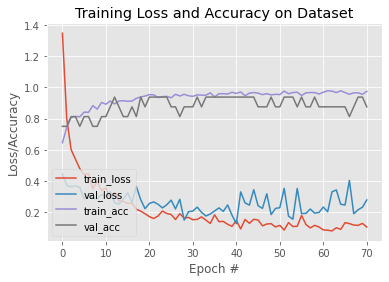

In [ ]:
N=71 #MODEL EARLY STOPPED AT 71 EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

# **FINAL CONCLUSION:**
1.Model used here is Resnet50V2.

2.Classification report shows the F1-score of 84%  for the new data.


3.Further Tuning or Inclusion of more variation of the Images could possibly Increase the accuracy of the model to further extent. 
